In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
dataframe = pd.read_csv("../dataset/AirPassengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float')

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [14]:
train_size = int(len(dataset) * 0.67)
test_size =  len(dataset) - train_size
train , test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [15]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test,look_back)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [17]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size,look_back,1), stateful = True, return_sequences=True ))
model.add(LSTM(4, batch_input_shape=(batch_size,look_back,1), stateful = True ))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX,trainY,epochs=1,batch_size=batch_size,verbose=2,shuffle=True)
    model.reset_states()

92/92 - 2s - loss: 0.0312 - 2s/epoch - 21ms/step
92/92 - 0s - loss: 0.0195 - 146ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0186 - 149ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0184 - 148ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0171 - 130ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0173 - 144ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0161 - 136ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0163 - 132ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0149 - 132ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0133 - 148ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0119 - 148ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0077 - 147ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0071 - 130ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0064 - 148ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0048 - 130ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0046 - 131ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0048 - 131ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0040 - 132ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0038 - 147ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0036 - 147ms

44/44 [==============================] - 0s 689us/step
20.88316808370596
20.88316808370596


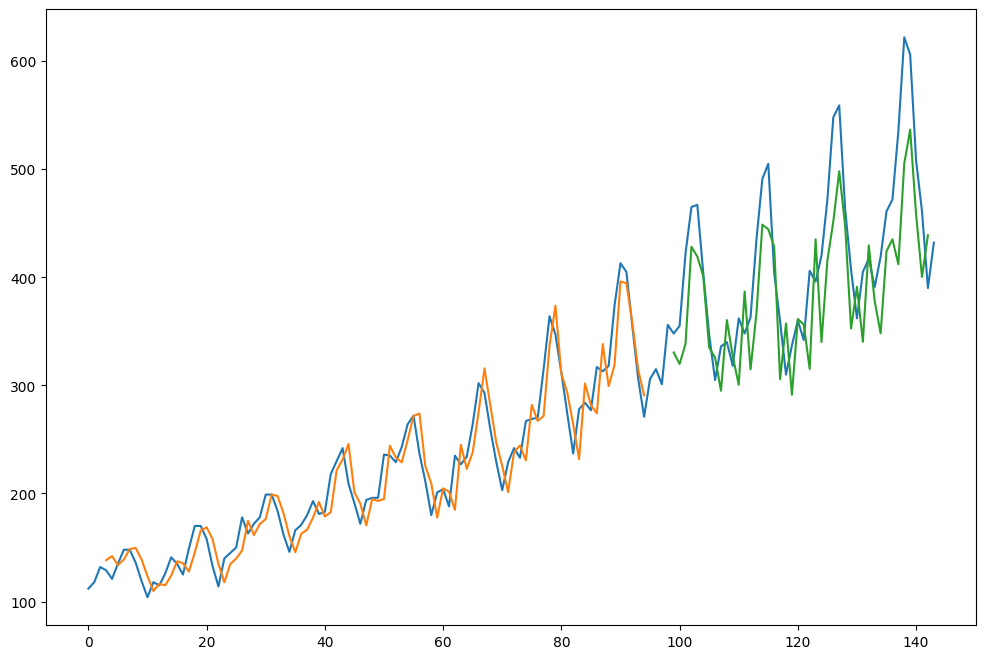

In [18]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict =model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY =  scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY =  scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(trainScore)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[ : , :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+ look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[ : , :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()